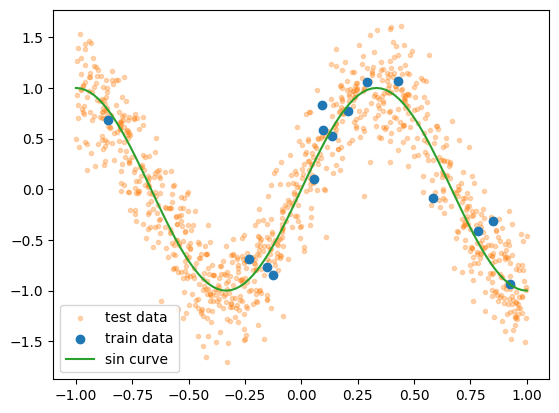

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
torch.manual_seed(0)
torch.is_anomaly_check_nan_enabled()
torch.autograd.set_detect_anomaly(True)

def generate_data(n, sigma):
    x = np.random.uniform(-1, 1, n)
    y = np.sin(1.5 * np.pi * x) + np.random.normal(0, sigma, n)
    return x, y


train_data = generate_data(15, 0.3)
test_data = generate_data(1000, 0.3)
plt.scatter(test_data[0], test_data[1], marker=".", c='tab:orange', label='test data', alpha=0.3)
plt.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')

x = np.linspace(-1, 1, 100)
y = np.sin(1.5 * np.pi * x)
plt.plot(x, y, c='tab:green', label='sin curve')
plt.legend()
plt.show()

In [28]:
def fitting_with_degree(degree, alpha=0.1, train_data=train_data):
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(train_data[0].reshape(-1, 1))
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(train_data[1], dtype=torch.float32).reshape(-1, 1)

    # モデルの定義
    model = torch.nn.Sequential(
        torch.nn.Linear(degree+1, 1, bias=False)
    )

    loss = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    max_iter = 10000
    for _ in range(max_iter):
        optimizer.zero_grad()
        y_pred = model(X_train)
        mse = loss(y_pred, y_train) + alpha * torch.norm(y_pred, p=2) ** 2
        mse.backward()
        optimizer.step()

    y_pred = model(X_train)
    print("deg", degree, "fitting loss", loss(y_pred, y_train).item())
    return model.state_dict()['0.weight'].detach().numpy().reshape(-1)

In [20]:
weight_dict2 = {}
train_loss_history2 = []
test_loss_history2 = []
for degree in range(2, 60):
    w = fitting_with_degree(degree, alpha=5)
    weight_dict2[degree] = w

    train_x_poly = PolynomialFeatures(degree=degree).fit_transform(train_data[0].reshape(-1, 1))
    train_loss = np.mean((train_data[1] - train_x_poly @ w) ** 2)
    train_loss_history2.append(train_loss)

    test_x_poly = PolynomialFeatures(degree=degree).fit_transform(test_data[0].reshape(-1, 1))
    test_loss = np.mean((test_data[1] - test_x_poly @ w) ** 2)
    test_loss_history2.append(test_loss)

deg 2 fitting loss tensor(0.5042, grad_fn=<MseLossBackward0>)
deg 3 fitting loss tensor(0.4957, grad_fn=<MseLossBackward0>)
deg 4 fitting loss tensor(0.4940, grad_fn=<MseLossBackward0>)
deg 5 fitting loss tensor(0.4939, grad_fn=<MseLossBackward0>)
deg 6 fitting loss tensor(0.4933, grad_fn=<MseLossBackward0>)
deg 7 fitting loss tensor(0.4931, grad_fn=<MseLossBackward0>)
deg 8 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)
deg 9 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)
deg 10 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)
deg 11 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)
deg 12 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)
deg 13 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)
deg 14 fitting loss tensor(0.4931, grad_fn=<MseLossBackward0>)
deg 15 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)
deg 16 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)
deg 17 fitting loss tensor(0.4930, grad_fn=<MseLossBackward0>)


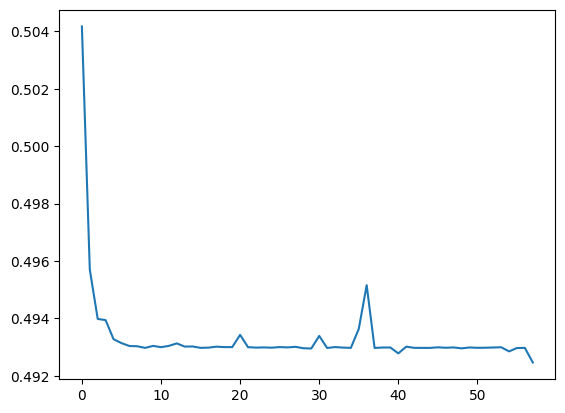

In [21]:
plt.plot(train_loss_history2)

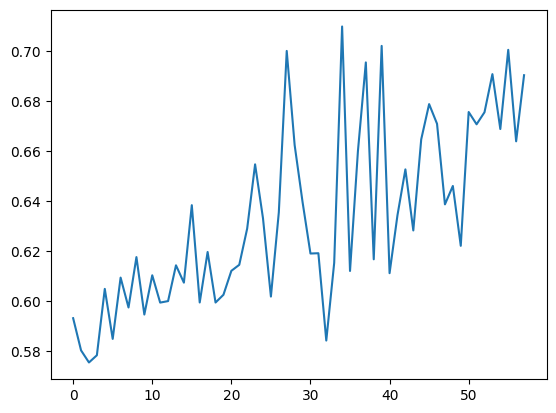

In [22]:
plt.plot(test_loss_history2, label='test loss')

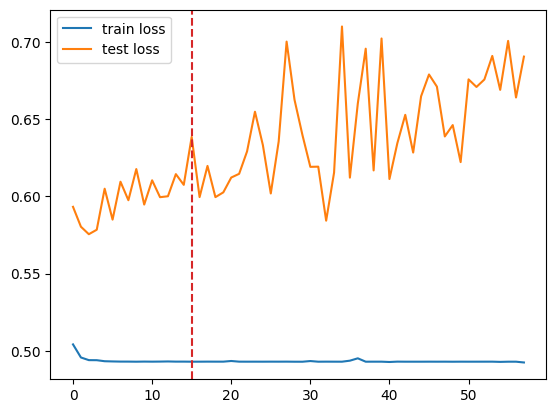

In [23]:
plt.plot(train_loss_history2, label='train loss')
plt.plot(test_loss_history2, label='test loss')
plt.axvline(x=15, color='tab:red', linestyle='--')
plt.legend()
plt.show()

In [7]:
weight_dict = {}
train_loss_history = []
test_loss_history = []
for degree in range(2, 60):
    w = fitting_with_degree(degree, alpha=0.5)
    weight_dict[degree] = w

    train_x_poly = PolynomialFeatures(degree=degree).fit_transform(train_data[0].reshape(-1, 1))
    train_loss = np.mean((train_data[1] - train_x_poly @ w) ** 2)
    train_loss_history.append(train_loss)

    test_x_poly = PolynomialFeatures(degree=degree).fit_transform(test_data[0].reshape(-1, 1))
    test_loss = np.mean((test_data[1] - test_x_poly @ w) ** 2)
    test_loss_history.append(test_loss)

deg 2 fitting loss tensor(0.4897, grad_fn=<MseLossBackward0>)
deg 3 fitting loss tensor(0.4433, grad_fn=<MseLossBackward0>)
deg 4 fitting loss tensor(0.4422, grad_fn=<MseLossBackward0>)
deg 5 fitting loss tensor(0.4176, grad_fn=<MseLossBackward0>)
deg 6 fitting loss tensor(0.4175, grad_fn=<MseLossBackward0>)
deg 7 fitting loss tensor(0.4180, grad_fn=<MseLossBackward0>)
deg 8 fitting loss tensor(0.4174, grad_fn=<MseLossBackward0>)
deg 9 fitting loss tensor(0.4171, grad_fn=<MseLossBackward0>)
deg 10 fitting loss tensor(0.4171, grad_fn=<MseLossBackward0>)
deg 11 fitting loss tensor(0.4164, grad_fn=<MseLossBackward0>)
deg 12 fitting loss tensor(0.4167, grad_fn=<MseLossBackward0>)
deg 13 fitting loss tensor(0.4166, grad_fn=<MseLossBackward0>)
deg 14 fitting loss tensor(0.4166, grad_fn=<MseLossBackward0>)
deg 15 fitting loss tensor(0.4166, grad_fn=<MseLossBackward0>)
deg 16 fitting loss tensor(0.4165, grad_fn=<MseLossBackward0>)
deg 17 fitting loss tensor(0.4166, grad_fn=<MseLossBackward0>)


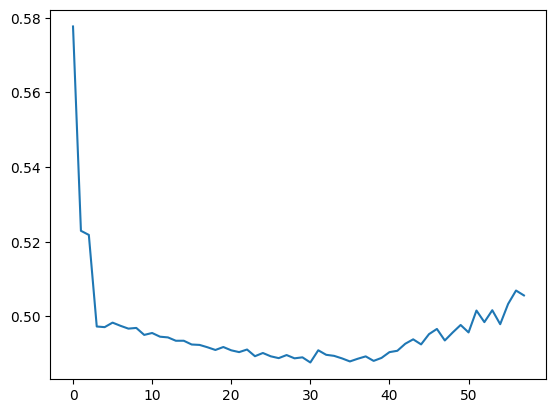

In [8]:
plt.plot(test_loss_history, label='test loss')

In [ ]:
weight_dict = {}
train_loss_history = []
test_loss_history = []
for degree in range(2, 60):
    w = fitting_with_degree(degree, alpha=1)
    weight_dict[degree] = w

    train_x_poly = PolynomialFeatures(degree=degree).fit_transform(train_data[0].reshape(-1, 1))
    train_loss = np.mean((train_data[1] - train_x_poly @ w) ** 2)
    train_loss_history.append(train_loss)

    test_x_poly = PolynomialFeatures(degree=degree).fit_transform(test_data[0].reshape(-1, 1))
    test_loss = np.mean((test_data[1] - test_x_poly @ w) ** 2)
    test_loss_history.append(test_loss)

In [24]:
weight_dict = {}
train_loss_history = []
test_loss_history = []
for degree in range(2, 60):
    w = fitting_with_degree(degree, alpha=1)
    weight_dict[degree] = w

    train_x_poly = PolynomialFeatures(degree=degree).fit_transform(train_data[0].reshape(-1, 1))
    train_loss = np.mean((train_data[1] - train_x_poly @ w) ** 2)
    train_loss_history.append(train_loss)

    test_x_poly = PolynomialFeatures(degree=degree).fit_transform(test_data[0].reshape(-1, 1))
    test_loss = np.mean((test_data[1] - test_x_poly @ w) ** 2)
    test_loss_history.append(test_loss)

deg 2 fitting loss tensor(0.4989, grad_fn=<MseLossBackward0>)
deg 3 fitting loss tensor(0.4598, grad_fn=<MseLossBackward0>)
deg 4 fitting loss tensor(0.4520, grad_fn=<MseLossBackward0>)
deg 5 fitting loss tensor(0.4516, grad_fn=<MseLossBackward0>)
deg 6 fitting loss tensor(0.4490, grad_fn=<MseLossBackward0>)
deg 7 fitting loss tensor(0.4490, grad_fn=<MseLossBackward0>)
deg 8 fitting loss tensor(0.4477, grad_fn=<MseLossBackward0>)
deg 9 fitting loss tensor(0.4469, grad_fn=<MseLossBackward0>)
deg 10 fitting loss tensor(0.4472, grad_fn=<MseLossBackward0>)
deg 11 fitting loss tensor(0.4473, grad_fn=<MseLossBackward0>)
deg 12 fitting loss tensor(0.4473, grad_fn=<MseLossBackward0>)
deg 13 fitting loss tensor(0.4473, grad_fn=<MseLossBackward0>)
deg 14 fitting loss tensor(0.4471, grad_fn=<MseLossBackward0>)
deg 15 fitting loss tensor(0.4475, grad_fn=<MseLossBackward0>)
deg 16 fitting loss tensor(0.4473, grad_fn=<MseLossBackward0>)
deg 17 fitting loss tensor(0.4473, grad_fn=<MseLossBackward0>)


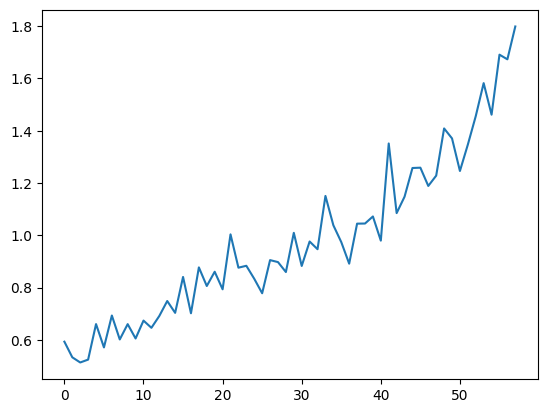

In [25]:
plt.plot(test_loss_history, label='test loss')

In [29]:
weight_dict = {}
train_loss_history = []
test_loss_history = []
for degree in range(2, 60):
    w = fitting_with_degree(degree, alpha=0.1)
    weight_dict[degree] = w

    train_x_poly = PolynomialFeatures(degree=degree).fit_transform(train_data[0].reshape(-1, 1))
    train_loss = np.mean((train_data[1] - train_x_poly @ w) ** 2)
    train_loss_history.append(train_loss)

    test_x_poly = PolynomialFeatures(degree=degree).fit_transform(test_data[0].reshape(-1, 1))
    test_loss = np.mean((test_data[1] - test_x_poly @ w) ** 2)
    print("test loss", test_loss)
    test_loss_history.append(test_loss)

deg 2 fitting loss 0.4704589247703552
test loss 0.5968197307736792
deg 3 fitting loss 0.26361915469169617
test loss 0.2894732164829816
deg 4 fitting loss 0.2223980873823166
test loss 0.2913411896256779
deg 5 fitting loss 0.22032533586025238
test loss 0.25985317712118167
deg 6 fitting loss 0.2086830586194992
test loss 1.5159210121135047
deg 7 fitting loss 0.2028820514678955
test loss 0.7909132781825394
deg 8 fitting loss 0.19888456165790558
test loss 3.2025713490805585
deg 9 fitting loss 0.1985558718442917
test loss 0.8797388999673325
deg 10 fitting loss 0.19757762551307678
test loss 2.5063409996372648
deg 11 fitting loss 0.19770418107509613
test loss 1.300683747762177
deg 12 fitting loss 0.19790317118167877
test loss 2.9164541017255727
deg 13 fitting loss 0.19800466299057007
test loss 2.3772836509328537
deg 14 fitting loss 0.19849300384521484
test loss 4.1572765873527935
deg 15 fitting loss 0.19802583754062653
test loss 3.881026025203052
deg 16 fitting loss 0.1978263258934021
test loss